# Omnibus Tests and Model Comparisons
In the previous section, we saw how to use dummy variables with multiple categorical levels and then specify a subsequent regression model that fits group means and mean differeces. Although we called this a One-way ANOVA model, we have yet to connect what we have done with the familiar ANOVA table. In this section, we will complete the picture by discussing the nature of the ANOVA omnibus tests and showing how these are effectively *model comparisons*. The familiar ANOVA table is simply a way of displaying the results of model comparisons.

## ANOVA as a Model Comparison Procedure
In order to understand the ANOVA within the framework of linear models, we need to demonstrate how the ANOVA results are simply the outcomes from comparing different linear models in a specific way. To begin, we need to consider the logic of an *omnibus test*. 

### Omnibus Tests
An omnibus test is a test that contains *multiple* comparisons between means. In comparison to a procedure such as a $t$-test, which only compares *two* means, an omnibus test can compare *multiple* means. In our example of a One-way ANOVA where $k = 3$, the omnibus null hypothesis is

$$
\mathcal{H}_{0} : \mu_{1} = \mu_{2} = \mu_{3}.
$$

In other words, the null is that *all* the means are identical. We can also put this in the context of the model in the previous part. If all the means were identical, they would the same as the grand mean and the deflections would be 0. We can therefore express our omnibus null equivalently as

$$
\mathcal{H}_{0} : \alpha_{1} = \alpha_{2} = \alpha_{3} = 0.
$$

No matter how it is written, an omnibus test is able to simultaneously consider *all possible comparions* between the group means. Within the NHST framework, a significant omnibus effect suggests that *at least one* of all possible mean differences is significant. Traditionally, we would then drill-down to see which of the differences is driving this effect.

```{admonition} What is the point of an omnibus test?
:class: tip, dropdown
At this point, you may well ask: what is the point of an omnibus test? If we just end up drilling-down to work out which differences are significant, why not just start there? Why even both with the omnibus test? 

The traditional argument is one of *error control* in relation to the problem of *multiple testing* or *multiple comparisons*. If our categorical variable has $k$ levels, then there are $m = \frac{k(k-1)}{2}$ comparisons we can make between the levels. If our desired error level is given by $\alpha$, then across all tests the probability of *at least one* being significant is $1 - (1 - \alpha)^{m}$. This is known as the *familywise error rate* (FWER). So, notice that whenever $m > 1$ our desired error-rate will be scaled by the number of tests and therefore get *bigger*. 

As an example, if we take $k = 5$ and $\alpha = 0.05$, we have $m = 10$ comparisons between means that we can make and the FWER is 

$$
\text{FWER} = 1 - (1 - \alpha)^{m} = 1 - 0.95^{10} = 0.40.
$$

This means there is now a 40% chance of a significant effect under the null, rather than a 5% chance. This is the *multiple testing* problem. The more levels our categorical predictor has, the worse this gets. This is where an omnibus test helps because, irrespective of the value of $k$, the FWER stays at the desired $\alpha$ because it is only a *single test*. So, we can have a factor with many levels and can assess all the differerences simultaneously using a single test that does not inflate the FWER.

It is worth noting as well that multiple testing is really a problem of NHST and frequentist statistics. Because of these approaches, there is a sense that traditional statistical inference actively *punishes* researchers for wanting to investigate and explore their data. This is not universal of all statistical methods. For instance, Bayesian statistics allows as many comparisons as you want without disturbing the probabilistic structure of the conclusions. So just know that ominbus tests and the multiple comparisons problem are not *universal* in statistics, rather they are a consequence of one particular school of thought and one particular definition of probability.
```

### Omnibus Tests From Model Comparisons
So, how do we generate omnibus tests from model comparisons? To see how this works, consider that the omnibus null hypothesis above actually *implies* a specific model. If it were true that all the group means are identical, then the grouping variable is effectively meaningless. It has simply chopped the data up randomly into 3 groups. Assuming that the population means of the groups are all the *same* implies that all the data are drawn from the *same population distibution*. Thus, rather than assuming

$$
y_{ij} \sim \mathcal{N}\left(\mu + \alpha_{j},\sigma^{2}\right)
$$

we are assuming

$$
y_{i} \sim \mathcal{N}\left(\mu,\sigma^{2}\right).
$$

Here we have *two different models*. One that just assumes a single mean for all the data and one that assumes *different* means for the different groups. Typically, these are called the *null model* and the *full model*, so we have

$$
\begin{alignat*}{3}
    \mathcal{M}_{0} &: y_{i}  &&= \mu + \epsilon_{i} &&\quad \text{Null Model} \\
    \mathcal{M}_{1} &: y_{ij} &&= \mu + \alpha_{j} + \epsilon_{ij} &&\quad \text{Full Model} \\
\end{alignat*}
$$

In `R`, sticking with our `mtcars` example, we could specify these in the following way[^intercept-foot]

In [1]:
data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe',
                   'Europe','Europe','Europe','Europe','Europe','USA','USA','USA',
                   'Europe','Japan','Japan','Japan','USA','USA','USA','USA',
                   'Europe','Europe','Europe','USA','Europe','Europe','Europe')
mtcars$origin <- as.factor(mtcars$origin)

In [2]:
null.mod <- lm(mpg ~ 1,      data=mtcars) # null model (intercept only)
full.mod <- lm(mpg ~ origin, data=mtcars) # full model (intercept + factor)

Thus, the full model contains our categorical variable of interest and the null model does not. If our question revolves around whether this predictor is actually necessary, a natural way to do so would be to compare how well each model fits the data. If the null and full model have a similar model fit, then it suggests that `origin` is doing little more than an intercept. In other words, the groups means appear largely identical. Alternatively, if the full model fits much better than the null model then it suggests that allowing the group means to differ is a more accurate reflection of the data. In other words, at least two of the group means appear to be different.

### Model Comparisons Using Sums-of-Squares
In order to compare the model fits, the most intuitive method would be to calculate the the magnitude of the residual variance of each model and compare them. If a model fits better, its residual variance will be smaller, meaning that the average degree to which the data deviates from the model prediction is smaller. Intutively, what we might think about doing is calculating

$$
\Delta\sigma^{2} = \sigma^{2}_{\text{null}} - \sigma^{2}_{\text{full}}.
$$

At the level of the *population*, this would work. However, at the level of *sample estimates*, this is actually a messy quantity that does not cleanly isolate the improvement added by the full model. To see why, consider the expanded definition of the variances as calculated from a sample

$$
\Delta\hat{\sigma}^{2} = \underbrace{\frac{\sum{\epsilon_{0}^{2}}}{n - p_{0}}}_{\hat{\sigma}^{2}_{\text{null}}} - \underbrace{\frac{\sum{\epsilon_{1}^{2}}}{n - p_{1}}}_{\hat{\sigma}^{2}_{\text{full}}},
$$

where $p_{0}$ and $p_{1}$ are the number of parameters from the null and full models. Written this way, it is clear that we are subtracting quantities with different denominators[^pop-foot]. This makes the final value unclear in terms of what it is actually telling us, because the two terms are weighted differently.

#### Sum-of-Squares for the Effect
Given that the residual variance is *not* a suitable metric, our solution is to simply forego the denominators to give

$$
SS_{\text{effect}} = \sum{\epsilon_{0}^{2}} - \sum{\epsilon_{1}^{2}} = RSS_{\text{null}} - RSS_{\text{full}}
$$

This value is more usually known as the *between-groups sum-of-squares* ($SS_{B}$) and is formed from the *residual sum-of-squares* (RSS) from each model. Unlike the residual variance, the sum-of-squares *do* have nice summative properties and can be used to assess the model fit across models with different numbers of parameters.


`````{admonition} Key Point!
:class: tip
The main point here is that, when comparing different models, the residual variance does not have nice summative properties, due to the degrees of freedom. This means that we cannot isolate the magnitude of the model improvement by using the sample error variances because

$$
\hat{\sigma}^{2}_{\text{effect}} \neq \hat{\sigma}^{2}_{\text{null}} - \hat{\sigma}^{2}_{\text{full}}.
$$

However, we *can* work with the sums-of-squares because they *do* have nice summative properties. As such

$$
SS_{\text{effect}} = RSS_{\text{null}} - RSS_{\text{full}}.
$$

This is a direct consequence of removing the messiness of the denominators from the calculation and is the reason why ANOVAs and other model comparisons procedures tend to focus on sums-of-squares.
`````

Let us see this in practice for our two example models. In the code below, we can calculate the RSS as a measure of each model fit. The *larger* the value, the more error remains and the *worse* the model fits the data.

In [3]:
null.RSS <- sum(resid(null.mod)^2)
full.RSS <- sum(resid(full.mod)^2)

print(c(null.RSS,full.RSS))

[1] 1126.0472  732.1721


So, we can see already that the null model has a larger RSS and thus is a worse fit to the data. The difference between these values therefore tells us how much the error *reduces* after including `origin` in the model.

In [4]:
SS.B <- null.RSS - full.RSS

print(SS.B)

[1] 393.8751


Generally, we cannot interpret this value directly because it is not any sort of standardised scale. However, what we can do is compare this value *relative* to some other measure on the same scale. At present, the $SS_{B}$ gives us a sense of how much we have reduced the error of the null model by including a specific predictor. What we want to know is whether this is *large* or *small*. More generally, we want to know whether any improvement we have seen is likely to be random noise (in which case the predictor has done *nothing* to help the model) or whether it implies something more systematic about the data (such as the population means differing across the groups).

#### Sum-of-Squares for the Error
Given what we have stated above, what we need is some measure of *noise* to compare $SS_{B}$ to. This will tell us whether $SS_{B}$ is large relative to the noise in the data, or of a similar magnitude. If it is of a similar magnitude, then we have no way of telling whether any apparent improvement is actually just random variation. It might be, or it might not be, we cannot tell. However, if the improvement is much larger than noise, then it gets harder to believe that the improvement is simply random chance. In this case, it becomes more plausible that there is some systematic relationship between the data and the predictor we have added into the full model. In the context of an ANOVA, this would be taken as evidence of some difference between the group means. For this purpose, we typically use $RSS_{\text{full}}$ to represent noise.

```{admonition} Why choose $RSS_{\text{full}}$?
:class: tip, dropdown
In general, within the context of our two models we have two options to represent noise: $RSS_{\text{null}}$ or $RSS_{\text{full}}$. These are both sums-of-sqaures that reflect *error* or *noise*, as they capture the degree of variability that is left-over within each model. If it were the case that the predictor was *not* related to the data then these quantities would be similar. However, if the predictor *was* related to the data then the null model would be missing a key explanatory component and its error would be larger than it should be. This would make $RSS_{\text{null}}$ a poor choice. Because of this, $RSS_{\text{full}}$ becomes the much better option. If the predictor *does* relate to the data then $RSS_{\text{full}}$ will be the correct magnitude, but if the predictor *does not* relate to the data then $RSS_{\text{full}}$ will be similar to $RSS_{\text{null}}$. So either way, $RSS_{\text{full}}$ becomes the better measure of *noise*.
```

Within the context of an ANOVA model, $RSS_{\text{full}}$ is more usually known as the *within-group sum-of-squares*, or $SS_{W}$ for short. This is because it effectively measures variability in terms of the scattering of individual subjects around the group means. In other words, how well do the group means fit the data? Within our example in `R`, we already calculated $RSS_{\text{full}}$ and so can simply copy it to a new variable with a different name.

In [5]:
SS.W <- full.RSS
print(SS.W)

[1] 732.1721


### The $F$-ratio
Given what we have discussed above, we could just eye-ball the magnitude of $SS_{B}$ relative to $SS_{W}$. However, a more principled approach is to combine these values into some sort of *test statistic*, akin to the $t$-statistic we have discussed previously. In doing so, we can combine the two sources of information into a single standardised value that can be interpreted across different datasets. Much in the same way that a $t$-statistic is formed by dividing an *effect* by *error*, we could similarly form a statistic by calculating $\frac{SS_{B}}{SS_{W}}$. This would tell us how large the improvement in model fit is, relative to the amount of error left over. 

The statistic we use for this purpose is known as $F$ (named after *Fisher*). Given the description above, it may seem like we could calculate $F = \frac{SS_{B}}{SS_{W}}$. However, there is some additional complexity. Although both $SS_{B}$ and $SS_{W}$ appear to be compatible, because they are both sums-of-squares, they cannot be directly compared. This is because they are both *sums*, and so their magnitude is dependant upon whatever we are summing over. If they were both summed over the same element of the model, there would be no problem. But this is not the case. As we will see below, the magnitude of $SS_{B}$ depends upon the number of model parameters, yet the magnitude of $SS_{W}$ depends upon the sample size. So both terms need to be *scaled* first, to make them truly comparable. These scaled values are known as *mean squares*.

#### The Between-Group Mean Square
Starting with $SS_{B}$, this value can be interpreted as the improvement in model fit after adding a certain number of parameters to the model. Unfortunately, this value will always scale with the number of parameters we add. This is because the more parameters we add, the better the fit can become. The most extreme example of this is having one parameter for every observation. In this case, we could make the model fit *perfectly* with no error. Thus, we can always make the model better and better by adding more and more parameters[^overfit-foot]. The problem is that we do not know whether $SS_{B}$ is large because of a genuine improvement to the model fit, or simply because we have added more parameters. 

To make this value more meaningful, we can therefore divide it by the number of parameters we have added to give an *average improvement per-parameter*. This has the advantage of turning the sums-of-squares back into a measure of variance, but one that is now correctly calculated to give $\hat{\sigma}^{2}_{\text{effect}}$. The number of additional parameters is known as the *numerator degrees of freedom* (or $df_{1}$) and the scaled version of $SS_{B}$ is known as the *between-group mean square*, or $MS_{B}$ for short. As such 

$$
MS_{B} = \frac{SS_{B}}{df_{1}} = \frac{SS_{B}}{k - 1} = \hat{\sigma}^{2}_{\text{effect}}.
$$

In the case of the `mtcars` example, we need to add $k - 1 = 2$ parameters to the model to capture the different group means. As such, we divide $SS_{B}$ by $df_{1} = 2$ to produce the $MS_{B}$

In [6]:
df.1 <- 2
MS.B <- SS.B / df.1
print(MS.B)

[1] 196.9376


So, we have an improvement in model fit in terms of reducing the error variance by 196.94 per-parameter.

#### The Within-Group Mean Square
Moving on to $SS_{W}$, we have a similar problem because this value always scales with *sample size*. Remember, this is simply the RSS for the full model. As such, the more residuals we have, the larger the sum will be. As noted above for $SS_{B}$, we therefore do not know whether $SS_{W}$ is large because the model fit is poor, or because we have a large $n$.

Using a similar logic to above, it would seem that we could just divide $SS_{W}$ by $n$. However, there is a catch. Because $SS_{W}$ is an *estimate* that depends upon other estimates (i.e. the parameters from the model), it does not scale with $n$ it actually scales with $n-p$. This is the same logic as Bessel's correction and agrees with what we have discussed before about degrees of freedom. In fact, dividing $SS_{W}$ by $n-p$ gives us the estimated *error variance* of the model, $\hat{\sigma}^{2}$. Within the context of an ANOVA, this is known as the *within-groups mean-square*, or $MS_{W}$ for short 

$$
MS_{W} = \frac{SS_{W}}{df_{2}} = \frac{SS_{W}}{n-p} = \hat{\sigma}^{2}_{\text{error}}.
$$

We can see this in our `mtcars` example

In [7]:
df.2 <- full.mod$df.residual # this is always n - p
MS.W <- SS.W / df.2
print(MS.W)

[1] 25.24731


Which, as already indicated, is *identical* to the error variance from the full model.

In [8]:
sigma <- summary(full.mod)$sigma
print(sigma^2)

[1] 25.24731


This gives us the left-over variance after fitting the full model. So together, we have a reduction in residual variance of 196.94 after adding `origin` to the model, with only a residual variance of 25.25 left over. 


If our reduction in variance were of a similar magnitude to the amount left over, we could not say with any certainty that it was a true effect because the "effect" and the "error" look basically the same. However, in this case, the reduction in error variance is *much larger* than the amount left over, which is already suggestive of some true effect and thus that including `origin` in the model allows for a much better model fit. Because the `origin` factor allows for the group means to differ, this implies that *at least* one pair of group means are different from each other. This connects this result directly to our original omnibus hypothesis.

```{admonition} What's in a name?
:class: tip
As we can see, some of the confusion around ANOVAs and ANOVA calculations simply comes down to using *different names* for familiar quantities. The name ANOVA tells us that the method involves comparing variances, yet those variances are called *mean-squares*. Usually, we would not give a name to the intermediate quantities produced during the calculation of variances, but the ANOVA names them as *sums-of-squares*. These quantities take on more importance within an ANOVA, because the sums-of-squares are the only meaningful way to compare two model fits, before they can be scaled back into variances. However, this creates a confusing collection of sums-of-squares, mean squares and degrees of freedom. 

*Remember*, all we are doing is comparing two models using their residuals. That is it. Try not to get too lost in the specifics of *how* this is done and keep focus on the very simple aim of the ANOVA. Remember as well that the ANOVA table was introduced by Fisher as a convenient way of organising all the arithmetic. The table was designed to make the calculations less confusing, but the table is *not* the ANOVA itself. There is nothing in an ANOVA table that implies any form of model comparison, but this is exactly what it is showing. As we will see below, in `R` such a table can be produce by *directly* comparing two models, making this perspective event clearer.
```

#### The Definition of $F$
So, given everything we have discussed above, we have taken a rather long and winding road to the definition of the $F$-statistic, which is:

$$
F = \frac{SS_{B} / df_{1}}{SS_{W} / df_{2}} = \frac{MS_{B}}{MS_{W}} = \frac{\hat{\sigma}^{2}_{\text{effect}}}{\hat{\sigma}^{2}_{\text{error}}}.
$$

At its most basic, the $F$-ratio is compaing two measures of variance. Hence the name, Analysis of *Variance*. If we want to make this even simpler, we can say 

$$
F = \frac{\text{Improvement in error between the null and full models}}{\text{Error remaining}}.
$$

Or, to put this a difference way, how much variance have we managed to explain for each parameter we have added compared to how much we still have left to explain?

Given that $F$ is a *ratio*, we can think of its value in fairly simple terms. If $F = 1$ then the magnitude of the improvement is the same as the magnitude of the error. This is what we would expect if the null hypothesis were true, because any improvement is indistinguishable from normal sampling error. However, if $F > 1$, it means that the improvement is much larger than the error. The bigger this value becomes, the more the improvement dwarfs the error and the harder it becomes to believe that all we have captured is noise.

Because the $F$ is the ratio of two *estimates* ($\hat{\sigma}^{2}_{\text{effect}}$ and $\hat{\sigma}^{2}_{\text{error}}$), and because each estimate is a *random variable*, the $F$-ratio itself is a random variable with some distribution. Under the null hypothesis that there is no effect, $\sigma^{2}_{\text{effect}} = \sigma^{2}_{\text{error}}$ and the $F$-ratio will be 1 on average, as indicated above. The null $F$-distribution, as derived from our original assumptions of normality, has a form where the expected value is 1. This makes the null $F$-distribution only *one-tailed*, as illustrated below for an example $F_{2,29}$.

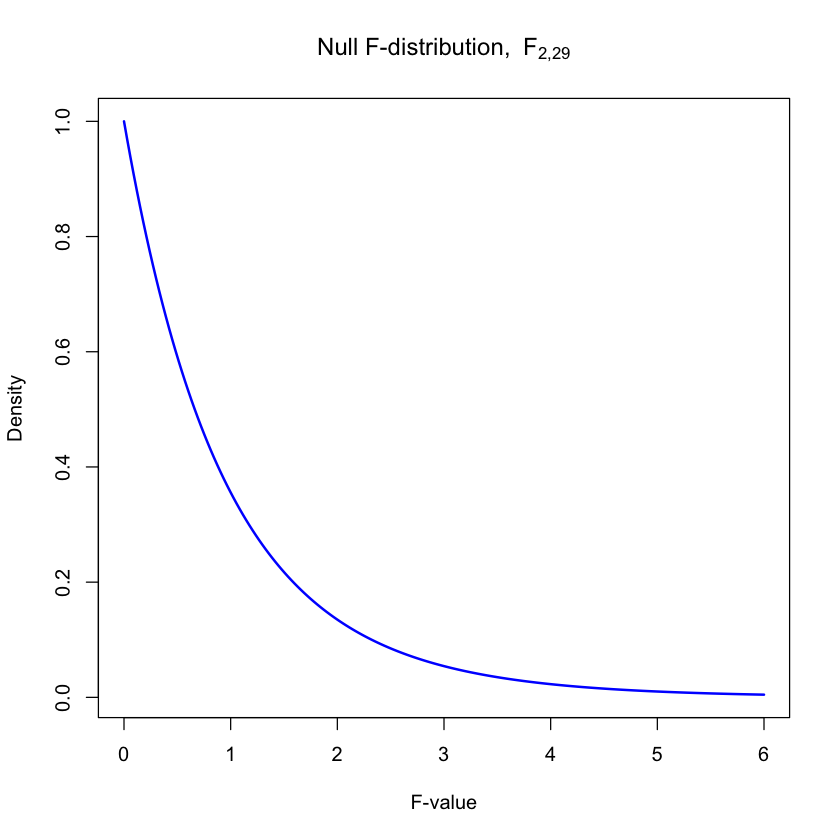

In [9]:
# Parameters
df1 <- 2   # numerator degrees of freedom
df2 <- 29  # denominator degrees of freedom

# Range of F values to plot
x <- seq(0, 6, length.out = 200)  # up to ~6 is enough for df1=2, df2=30

# Density of the F-distribution
y <- df(x, df1, df2)

# Plot
plot(x, y, type = "l",
     lwd = 2, col = "blue",
     main = bquote("Null F-distribution, " ~ F[2*","*29]),
     xlab = "F-value", ylab = "Density")

If we are following NHST convention, we can therefore compare the value of $F$ we have calculated to the null distribution and produce an associated $p$-value. As with the $t$-statistic, the larger $F$ becomes, the less probable it is if the null were true and thus the *smaller* the $p$-value becomes.

#### Summary of Calculations

Because the steps needed to calculate $F$ are quite involved, we have summarised all of them in the `R` code below. This will hopefully make it clear that we are really comparing two models to each other, it is just that we have to go about it in a slightly complicated way in order for the numbers to make sense. Also, do not worry, we will see how to automate all of this in `R` very shortly.

In [10]:
# Null model and full model
null.mod <- lm(mpg ~ 1,      data=mtcars)
full.mod <- lm(mpg ~ origin, data=mtcars)

# Residual sums-of-squares
null.RSS  <- sum(resid(null.mod)^2)
full.RSS  <- sum(resid(full.mod)^2)

# Sums-of-squares
SS.B <- null.RSS - full.RSS # between-groups (model improvement)
SS.W <- full.RSS            # within-groups (error)

# Mean-squares
df.1 <- 2                    # k - 1
df.2 <- full.mod$df.residual # n - p
MS.B <- SS.B / df.1          # reduction in error variance (effect)
MS.W <- SS.W / df.2          # remaining error variance (error)

# F-ratio
F <- MS.B / MS.W

# p-value from null F-distribution with df1 and df2
p <- pf(q=F, df1=df.1, df2=df.2, lower.tail=FALSE)

# Results
print(data.frame("F.ratio"=F, "p.value"=p), row.names=FALSE)


  F.ratio     p.value
 7.800338 0.001946794


The value of $F$ indicates that the reduction in error between the null and full model is nearly 8 times *larger* than we would expect, if this effect was just noise. In other words, this is nearly 8 times bigger than our expectation under the null hypothesis of no differences between the group means. The probability of achieving a value of $F_{2,29} = 7.80$ if the null were true is $p = 0.002$, which is below the usual NHST threshold of $p = 0.05$, thus this would be declared "significant" within this framework. In terms of our omnibus hypothesis, this is taken to imply that *at least one* of the mean differences between the levels of `origin` is also significant.

## ANOVA Tables in `R`
As should now be clear, the calculation of $F$ as a metric for comparing two models is somewhat involved. As such, it would be a bit unreasonable if we were expected to perform all this arithmetic manually every time we wanted to compare two models. Luckily, `R` can do all of this very easily for us using the `anova()` function. All we do is provide the function with two models (or more) and `R` will produce an ANOVA table of all the calculations, along with an $F$-statistic and $p$-value.

### The `anova()` Function
The built-in `anova()` function can be used in many different contexts to compare different models. For our current use case, providing two models fit using `lm()` will produce the expected ANOVA table. For example

In [11]:
print(anova(null.mod, full.mod))

Analysis of Variance Table

Model 1: mpg ~ 1
Model 2: mpg ~ origin
  Res.Df     RSS Df Sum of Sq      F   Pr(>F)   
1     31 1126.05                                
2     29  732.17  2    393.88 7.8003 0.001947 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Within this table, we should see all the values that we calculated manually above. The `anova()` function can also automate the model comparisons procedure if we simply provide the full model, producing something closer to a traditional ANOVA table.

In [12]:
print(anova(full.mod))

Analysis of Variance Table

Response: mpg
          Df Sum Sq Mean Sq F value   Pr(>F)   
origin     2 393.88 196.938  7.8003 0.001947 **
Residuals 29 732.17  25.247                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


As practise, to make sure you have understood the discussion so far, see if you can explain all the values in this table.

### The `Anova()` Function
Although the default `anova()` function is useful for model comparisons, things start to get more complicated once we consider *unbalanced* higher-order ANOVA models. Unbalanced ANOVAs are those where there are different numbers of subjects in each group. We will discuss all this later, but for now it is enough to indicate that these types of application are special because the summative nature of the sums-of-squares breaks-down, making it harder to disentangle the different effects. Because of this, we just want to recommend the use of the `Anova()` function from the `car` package as the most flexible method of producing an ANOVA table within `R`. As an example

In [13]:
library(car)
print(Anova(full.mod))

Loading required package: carData



Anova Table (Type II tests)

Response: mpg
          Sum Sq Df F value   Pr(>F)   
origin    393.88  2  7.8003 0.001947 **
Residuals 732.17 29                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Here, there is no difference between `anova()` and `Anova()`. However, this will not always be true and so we would always recommend defaulting to `Anova()`. Notice that this table says `Type II tests` at the top. This is related to how the `Anova()` function deals with unablanced data, which `anova()` does not do. This is a complicated topic we will leave for another day. For the moment, just try and remember that whatever form of ANOVA table we produce, this is the result of comparing multiple models, with the $F$-statistic reflecting the degree of model improvement relative to the error.

### Effect Sizes and Confidence Intervals
As we can see above, the standard inferential results for the omnibus tests are based on $p$-values and NHST. If we would prefer effect sizes and confidence intervals, we can generate these using the `effectsize` package. In the example below, we generate Cohen's $f$. In general, effect sizes on omnibus tests are quite messy and difficult to interpret and are often not recommended. Still, if we want omnibus tests but do not want NHST, we have few options. This could be cause to just abandon omnibus tests entirely and jump straight to comparisons between means. There is an argument for this (as we will see more in the materials next week), but if we want a traditional ANOVA with traditional omnibus tests and no $p$-values, this is our only option.

Although there are several different ANOVA effect sizes, Cohen's $f^2$ is particularly useful in the context of model comparisons. ...

$$
f^2 = \frac{R^{2}_{\text{full}} - R^{2}_{\text{null}}}{1 - R^{2}_{\text{full}}}
$$

In [27]:
library(effectsize)
aov.table <- Anova(full.mod)
print(cohens_f(aov.table))

sqrt((summary(full.mod)$r.squared - summary(null.mod)$r.squared) / (1 - summary(full.mod)$r.squared))

For one-way between subjects designs, partial eta squared is equivalent
  to eta squared. Returning eta squared.



# Effect Size for ANOVA

Parameter | Cohen's f |      95% CI
-----------------------------------
origin    |      0.73 | [0.35, Inf]

- One-sided CIs: upper bound fixed at [Inf].

[1] 0.7334537

## The Regression ANOVA $F$-test
As a final point, it is interesting to note that we did not actually need to do any of the calculations above, because the results were provided all along at the bottom of the summary table for the full model.

In [15]:
summary(full.mod)


Call:
lm(formula = mpg ~ origin, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8071 -4.1718 -0.7885  3.3444 10.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.807      1.343  16.239 4.26e-16 ***
originJapan    3.753      2.618   1.434  0.16238    
originUSA     -5.669      1.935  -2.929  0.00656 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 29 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3049 
F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947


Notice that the very last line says:

`F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947`

which is exactly the results from the ANOVA table. In general, it is customary to always provide an omnibus test of the *whole* regression model, by comparing the full model to a model containing only an intercept. Because this model only contains a single predictor, this is then equivalent to the one-way ANOVA. In general, if there are multiple predictor variables, this will not be the same. However, the omnibus regression test is useful as a single way of asking the question "is our model actually doing anything?" or "is our model any better than just fitting an intercept?"

`````{topic} What do you now know?
In this section, we have explored the concept of omnibus ANOVA tests and model comparisons. After reading this section, you should have a good sense of:

- What an omnibus test is and why we might be interested in using them.
- The concept of an omnibus test as a *comparison* between two competing models (known as the *null* and *full* models).
- The idea that the omnibus test of a single factor in an ANOVA model is equivalent to comparing a model that contains the factor and the model that does not contain the factor.
- The concept that comparing two models uses the *residual sum-of-squares* rather than the error variance, due to differences in the number of model parameters. This results in a value known as the *between-groups sums-of-squares* ($SS_{B}$).
- The concept that the value of $SS_{B}$ is only meaningful when *compared* to some measure of noise. This measure of noise is typically the residual sums-of-squares from the full model, which is known as the *within-groups sums-of-squares* ($SS_{W}$).
- The idea that our final comparison forms a test statistic, known as $F$, from the ratio of the effect to the noise, similar to the structure of the $t$-statistic. However, both $SS_{B}$ and $SS_{W}$ must first be scaled to make them comparible.
- The idea that we can perform all these calculations in `R` automatically, either through explicit model comparisons with the `anova()` function, or by using the `Anova()` function from the `car` package.
- The concept that an overall ANOVA omnibus test is always provided at the bottom of the `summary()` table produced when using `lm()`.

`````

[^overfit-foot]: You may wonder what the problem is with this. Surely we want the model to fit as well as possible? However, a *perfect* fit suggests *over-fitting*. Remember, our aim is to use our model to separate those effects that are universal to our population of interest from the noise. A model that fits one specific dataset does not do this. In fact, it will be fitting *both* the effects we are interested in *and* the noise. This may result in a perfect fit for that specific dataset, but it tells us nothing about our population of interest and certainly would not fit another sample very well.

[^anova-foot]: This is actually true of the `anova()` function as well, but this function does not have the flexibility to deal with unbalanced models and so should be avoided in these cases.

[^intercept-foot]: Remember, the intercept term is always *implicit* in `R`. However, if you like the symmetry, you can specify the full model as `mpg ~ 1 + origin`. Similarly, you can remove the intercept by adding `- 1`, or you can use `0`. For instance, `mpg ~ origin - 1` or `mpg ~ 0 + origin`.

[^pop-foot]: Remember that Bessel's correction is related to *estimating* parameters from a sample. When we have the full population, we would simply divide by $n$ and could therefore compare the variances as the denominators would be the same.